## Mud card answers
- **In terms of regression with random forests, is there a linear model that is trained on the subset of examples that reaches the end of the branch? I suppose it's a bit difficult to see how it becomes a continuous values function, is the "range" of the random tree discrete?**
- **How does a decision tree arrive at a regression prediction? The nodes are categorical, right? So is there are baseline prediction (eg. mean of target) which gets updated? How does it get updated at each node?**
    - no, it's simplier than that
    - the prediction is the target variable's mean of the examples that reach the end of the branch
    - I'm not sure what you mean by the range of the random tree
- **Can the random subset of training data selected by each single tree in random forest have overlapping samples? (Otherwise the decision trees are not independent, right?)**
    - independent with respect to trees mean that the first tree does not influence how the second tree is created
    - random forests in sklearn use all points from the training set by default unless you explicitly specify the max_samples argument
- **How are the trees in the random forest generated? Do we select a percentage of features to consider and then all combinations of those features create a tree? Do we specify what the decision points in the tree should be?**
    - yes, you decide what percentage of features to consider (the max_features argument in sklearn)
    - the rest is done automatically by sklearn
        - it randomly select a subset of features for each tree
        - it determines the most accurate tree (all decision points) given the features by minimizing a cost function
- **"I am not sure how random forest choose the features, do they can be replacement.**
    - the features are selected randomly
- **for a continuous feature, how to they choose to split it.**
    - even if you have a continuos split, the number of possible splits is finite so the best split is selected by minimizing a cost function
- **How do they choose the training data to create the decision tree.**
    - you decide what X_train and y_train are not the algorithm
- **Does the subset of training data for each tree have the same size?**
    - the same size but not the same features
    - the subset of features used by each tree can be different
- **Is there a guideline/convention for parameter tuning for tree-based models?**
    - yep, that's what we cover today
- **If we were to use sklearn's RFC, would we still have to train this with the ten people then we could use this classifier to predict likelihood of liking video games?**
    - yep, in fact I did exactly that as I was preparing the dataset :)
- **I still don't understand how the algorithm determines what the thresholds to use for each feature, and which feature to split the data by first in each tree.**
    - [check out](https://web.stanford.edu/~hastie/ElemStatLearn/) the decision tree section of `Elements of Statistical Learning` for more info
    - this book is a great resource to learn more about the ML algorithms we cover in this class
- **Is the neural network mimicking something more like a random forest?**
    - yes, it's very different
    - I'll actually have another interactive in-class exercise for DATA2040 next spring
    - we will build a neural network where students will be the neurons
- **"You said the linear regression' behavior with outlines is linear extrapolation. I am sort of wondering what's difference between interpolation and extrapolation?**
    - interpolation is between two data points
    - extrapolation is extending a prediction beyond the range of your data points
- **should the random forest use all the features or it just use some of the features. Is it select features randomly?**
    - yes, it uses a subset of features and it selects the features randomly

## Supervised ML algorithms
By the end of this module, you will be able to
- Summarize how decision trees, random forests, and support vector machines work
- Describe how the predictions of these techniques behave in classification and regression
- Describe which hyper-parameters should be tuned

### A decision tree in regression

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
np.random.seed(10)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30

X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_new = np.linspace(0, 1, 1000)

reg = RandomForestRegressor(n_estimators=1,max_depth=1)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])


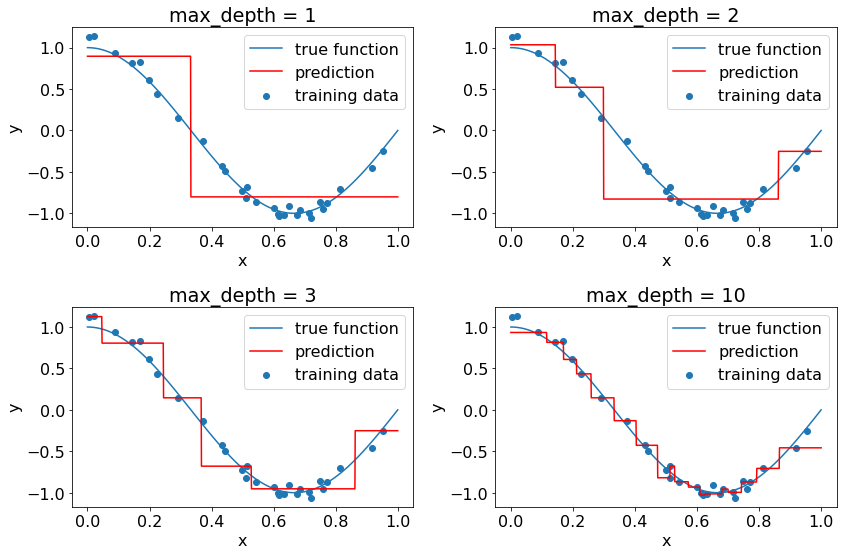

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})


plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = RandomForestRegressor(n_estimators=1,max_depth=1)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('max_depth = 1')
plt.legend()

plt.subplot(2,2,2)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = RandomForestRegressor(n_estimators=1,max_depth=2)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('max_depth = 2')
plt.legend()

plt.subplot(2,2,3)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = RandomForestRegressor(n_estimators=1,max_depth=3)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('max_depth = 3')
plt.legend()


plt.subplot(2,2,4)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = RandomForestRegressor(n_estimators=1,max_depth=10)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('max_depth = 10')
plt.legend()

plt.tight_layout()
plt.savefig('figures/tree_reg.png',dpi=300)
plt.show()


<center><img src="figures/tree_reg.png" width="800"></center>

## How to avoid overfitting with random forests?
- tune some (or all) of following hyperparameters:
   - max_depth
   - min_samples_split
   - max_features
- With sklearn random forests, **do not tune n_estimators**!
   - the larger this value is, the better the forest will be
   - set n_estimators to maybe a 100 while tuning hyperparameters
   - increase it if necessary once the best hyperparameters are found


| ML algo                      	| suitable for large datasets? 	| behaviour wrt outliers 	| non-linear? 	|  params to tune  	|smooth predictions| easy to interpret?|
|------------------------------	|:----------------------------:	|:----------------------:	|:-----------:	|:----------------:	|:----------------:	|:----------------:	|
| linear regression            	|              yes             	|linear extrapolation|      no     	| l1 and/or l2 reg 	| yes | yes|
| logistic regression          	|              yes             	|scales with distance from the decision boundary|      no     	| l1 and/or l2 reg 	| yes | yes|
| random forest regression     	|<font color='red'>so so</font> |<font color='red'>constant</font>|<font color='red'>yes</font>|<font color='red'>max_features,  max_depth</font>| <font color='red'>no</font>|<font color='red'>so so</font>|
| random forest classification 	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| SVM rbf regression               	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| SVM rbf classification           	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|

## A random forest in classification

In [3]:
from sklearn.datasets import make_moons
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# create the data
X,y = make_moons(noise=0.2, random_state=1,n_samples=200)
# set the hyperparameters
clf = RandomForestClassifier(n_estimators=1,max_depth=3,random_state=0)
# fit the model
clf.fit(X,y)
# predict new data
#y_new = clf.predict(X_new)
# predict probabilities
#y_new = clf.predict_proba(X_new)

RandomForestClassifier(max_depth=3, n_estimators=1, random_state=0)

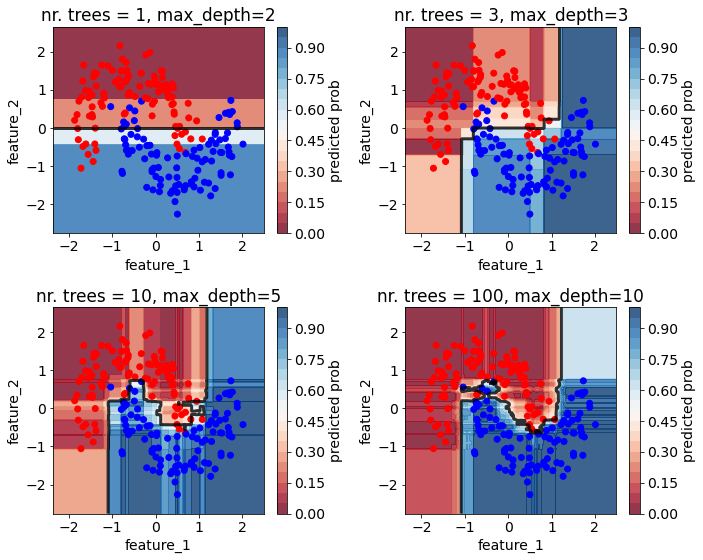

In [4]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
matplotlib.rcParams.update({'font.size': 14})

X = StandardScaler().fit_transform(X)

h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.figure(figsize=(10,8))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cm = plt.cm.RdBu

plt.subplot(2,2,1)
clf = RandomForestClassifier(n_estimators=1,max_depth=2,random_state=1)

clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('nr. trees = 1, max_depth=2')

plt.subplot(2,2,2)
clf = RandomForestClassifier(n_estimators=3,max_depth=3,random_state=4)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('nr. trees = 3, max_depth=3')

plt.subplot(2,2,3)
clf = RandomForestClassifier(n_estimators=10,max_depth=5,random_state=3)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('nr. trees = 10, max_depth=5')

plt.subplot(2,2,4)
clf = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=3)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('nr. trees = 100, max_depth=10')


plt.tight_layout()

plt.savefig('figures/forest_clf.png',dpi=300)
plt.show()




<center><img src="figures/forest_clf.png" width="800"></center>

| ML algo                      	| suitable for large datasets? 	| behaviour wrt outliers 	| non-linear? 	|  params to tune  	|smooth predictions| easy to interpret?|
|------------------------------	|:----------------------------:	|:----------------------:	|:-----------:	|:----------------:	|:----------------:	|:----------------:	|
| linear regression            	|              yes             	|linear extrapolation|      no     	| l1 and/or l2 reg 	| yes | yes|
| logistic regression          	|              yes             	|scales with distance from the decision boundary|      no     	| l1 and/or l2 reg 	| yes | yes|
| random forest regression     	|so so|constant|yes|max_features,  max_depth|no|so so|
| random forest classification 	|<font color='red'>so so</font> |<font color='red'>step-like, difficult to tell</font>|<font color='red'>yes</font>|<font color='red'>max_features,  max_depth</font>| <font color='red'>no</font>|<font color='red'>so so</font>|
| SVM rbf regression               	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| SVM rbf classification           	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|

### Quiz 1
True or false?
- It is possible to create a tree with a maximum depth larger than 1 which splits on the same feature on each level/node.
- Some trees are more accurate than others so when you combine the trees into a random forest, the predictions of some trees are heavier weighted than others.
- A tree can be arbitrarily deep. 
- Each node splits into two 'branches' or leaves.

## Support Vector Machine
- very versatile technique, it comes in lots of flavors/types, read moree about it [here](https://scikit-learn.org/stable/modules/svm.html)
- SVM classifier motivation
   - points in n dimensional space with class 0 and 1
   - we want to find the (n-1) dimensional hyperplane that best separates the points
   - this hyperplane is our (linear) decision boundary
- we cover SVMs with radial basis functions (rbf)
   - we apply a kernel function (a non-linear transformation) to the data points
   - the kernel function basically "smears" the  points
   - gaussian rbf kernel: $\exp(-\gamma (|x - x'|)^2)$ where $\gamma > 0$

## SVR

In [5]:
import numpy as np
from sklearn.svm import SVR
np.random.seed(10)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30

X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_new = np.linspace(-0.5, 1.5, 2000)

reg = SVR(gamma = 1, C = 1)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])


In [6]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
 |       Specifies th

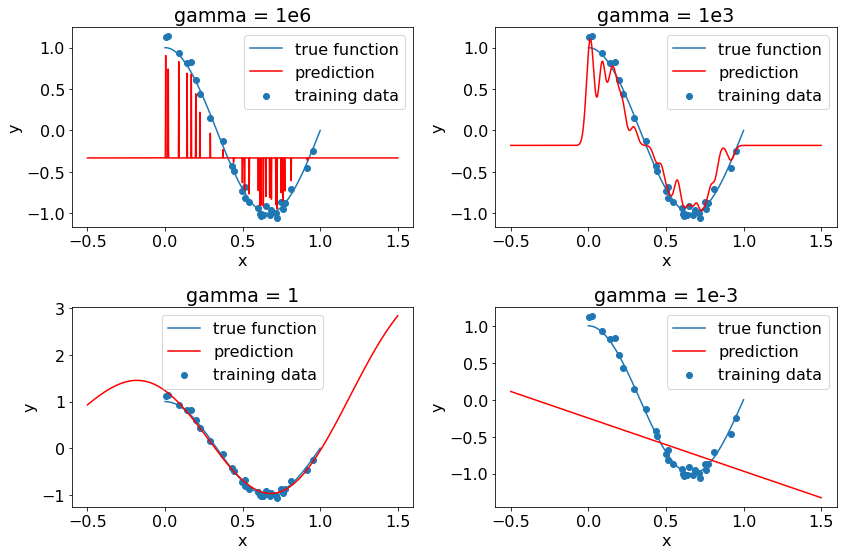

In [7]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})


plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = SVR(gamma = 1000000, C = 100)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('gamma = 1e6')
plt.legend()

plt.subplot(2,2,2)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = SVR(gamma = 1000, C = 100)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('gamma = 1e3')
plt.legend()

plt.subplot(2,2,3)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = SVR(gamma = 1, C = 100)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('gamma = 1')
plt.legend()


plt.subplot(2,2,4)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = SVR(gamma = 0.001, C = 100)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('gamma = 1e-3')
plt.legend()

plt.tight_layout()
plt.savefig('figures/SVM_reg.png',dpi=300)
plt.show()


<center><img src="figures/SVM_reg.png" width="800"></center>

| ML algo                      	| suitable for large datasets? 	| behaviour wrt outliers 	| non-linear? 	|  params to tune  	|smooth predictions| easy to interpret?|
|------------------------------	|:----------------------------:	|:----------------------:	|:-----------:	|:----------------:	|:----------------:	|:----------------:	|
| linear regression            	|              yes             	|linear extrapolation|      no     	| l1 and/or l2 reg 	| yes | yes|
| logistic regression          	|              yes             	|scales with distance from the decision boundary|      no     	| l1 and/or l2 reg 	| yes | yes|
| random forest regression     	|so so |constant|yes|max_features,  max_depth| no|so so|
| random forest classification 	|so so |step-like, difficult to tell|yes|max_features,  max_depth| no|so so|
| SVM rbf regression               	|<font color='red'>no</font>|<font color='red'>non-linear extrapolation</font>|<font color='red'>yes</font>|<font color='red'>C, gamma</font>|<font color='red'>yes</font>|<font color='red'>so so</font>|
| SVM rbf classification           	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|

### Quiz 2

Let's time how long it takes to fit a linear regression, random forest regression, and SVR as a function of `n_samples` using our toy regression dataset. Look up how to measure the runtime of a line or function call on stackoverflow. Set n_estimators to 10 and max_depth to 3 in the random forest. Set the gamma and C parameters to 1 in SVR. Fit models with n_samples = 1000, 2000, 3000, ..., 10000. Measure how long it takes to fit the model and plot the run time as a function of n_samples for the three models. You might need to adjust the y axis range to check some of the statements.

Which of these statements are true?

- The random forest fit time scales linearly with n_samples.
- The linear regression model is the fastest to fit. 
- The SVR fit time scales worse than linear. (I.e., if we double n_sample, the fit time more than doubles.)


## SVC

In [8]:
from sklearn.datasets import make_moons
import numpy as np
from sklearn.svm import SVC

# create the data
X,y = make_moons(noise=0.2, random_state=1,n_samples=200)
# set the hyperparameters
clf = SVC(gamma = 1, C = 1, probability=True)
# fit the model
clf.fit(X,y)
# predict new data
#y_new = clf.predict(X_new)
# predict probabilities
#y_new = clf.predict_proba(X_new)

SVC(C=1, gamma=1, probability=True)

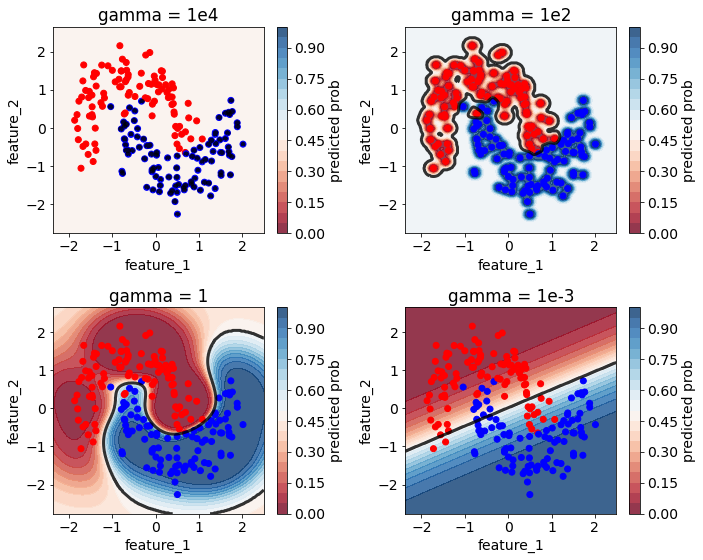

In [9]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

matplotlib.rcParams.update({'font.size': 14})

X = StandardScaler().fit_transform(X)

h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.figure(figsize=(10,8))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cm = plt.cm.RdBu

plt.subplot(2,2,1)
clf = SVC(gamma = 1e4, C = 100, probability=True)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('gamma = 1e4')

plt.subplot(2,2,2)
clf = SVC(gamma = 1e2, C = 100, probability=True)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('gamma = 1e2')

plt.subplot(2,2,3)
clf = SVC(gamma = 1e0, C = 100, probability=True)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('gamma = 1')

plt.subplot(2,2,4)
clf = SVC(gamma = 1e-3, C = 100, probability=True)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('gamma = 1e-3')


plt.tight_layout()

plt.savefig('figures/SVM_clf.png',dpi=300)
plt.show()




<center><img src="figures/SVM_clf.png" width="800"></center>

| ML algo                      	| suitable for large datasets? 	| behaviour wrt outliers 	| non-linear? 	|  params to tune  	|smooth predictions| easy to interpret?|
|------------------------------	|:----------------------------:	|:----------------------:	|:-----------:	|:----------------:	|:----------------:	|:----------------:	|
| linear regression            	|              yes             	|linear extrapolation|      no     	| l1 and/or l2 reg 	| yes | yes|
| logistic regression          	|              yes             	|scales with distance from the decision boundary|      no     	| l1 and/or l2 reg 	| yes | yes|
| random forest regression     	|so so |constant|yes|max_features,  max_depth| no|so so|
| random forest classification 	|so so |step-like, difficult to tell|yes|max_features,  max_depth| no|so so|
| SVM rbf regression               	|no|non-linear extrapolation|yes|C, gamma|yes|so so|
| SVM rbf classification           	|<font color='red'>no</font>|<font color='red'>50-50</font>|<font color='red'>yes</font>|<font color='red'>C, gamma</font>|<font color='red'>yes</font>|<font color='red'>so so </font>|

### Quiz 3
Bias variance trade off

Which gamma value gives the best trade off between high bias and high variance? Work through the steps to answer the question.

- Use random_state = 42 where-ever necessary.
- Split X, y into X_train, X_val, y_train, y_val such that 70% of the points are in train.
- Fit SVC models with C = 1, and gamma = 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3 on the training set.
- Measure the validation accuracy for each gamma.
- Which gamma value gives the highest validation accuracy?


## Mud card